<a href="https://colab.research.google.com/github/pharringtonp19/mecon/blob/main/notebooks/Profit_(pre_solver).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%capture 
!pip install jaxopt 

In [62]:
import jax 
jax.config.update("jax_enable_x64", True)
import jax.numpy as jnp 
import jaxopt
import matplotlib.pyplot as plt 
from typing import NamedTuple
from functools import partial 

In [40]:
#@title Demand Function
def demand(p):
  return 10 - 0.5*p - 0.25*p**2 

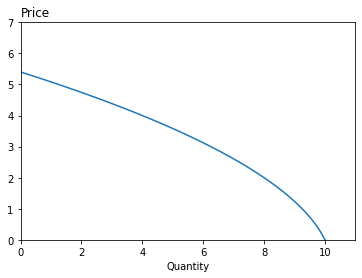

In [41]:
#@title Graph of Demand Function
ps = jnp.linspace(0, 10, 100)
qs = jax.vmap(demand)(ps)

plt.plot(qs, ps)
plt.title('Price', loc='left')
plt.xlabel('Quantity')
plt.xlim(0, 11)
plt.ylim(0, 7)
plt.show()

In [42]:
#@title Inverse Demand Higher Order Function
def inverse(f):

  def inverse_fn(q):
    
    def closure(p, q):
      return (f(p)-q)**2

    solver = jaxopt.GradientDescent(fun=closure, maxiter=2000)
    res = solver.run(2., q)
    return res.params

  return inverse_fn

In [43]:
#@title Check Inverse Demand Function
ps = jnp.linspace(0, 5, 100)
ps_prime = jax.vmap(lambda p: inverse(demand)(demand(p)))(ps)
print(f"The maximium difference: {jnp.max(jnp.abs(ps-ps_prime)):.3f}")

The maximium difference: 0.001


In [54]:
#@title Revenue
def revenue(demand, q):
  return inverse(demand)(q)*q 

In [58]:
#@title Cost Function
def cost(q):
  return 2. + 0.5*q**2

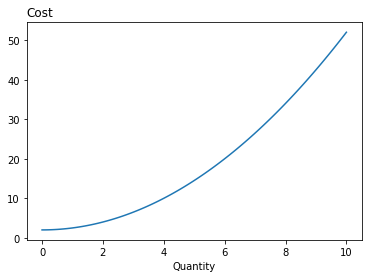

In [59]:
#@title Graph Cost Function
qs = jnp.linspace(0, 10, 100)
cs = jax.vmap(cost)(qs)

plt.plot(qs, cs)
plt.title('Cost', loc='left')
plt.xlabel('Quantity')
plt.show()

In [66]:
#@title Profit Function
def profit(demand, cost, q):
  return revenue(demand, q) - cost(q)

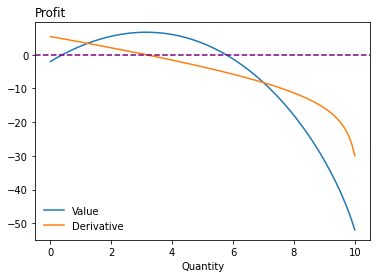

In [67]:
qs = jnp.linspace(0, 10, 100)
vs = jax.vmap(partial(profit, demand, cost))(qs)
vs_prime = jax.vmap(jax.grad(partial(profit, demand, cost)))(qs)

plt.plot(qs, vs, label='Value')
plt.plot(qs, vs_prime, label='Derivative')
plt.axhline(0, linestyle='--', color='purple')
plt.title('Profit', loc='left')
plt.xlabel('Quantity')
plt.legend(frameon=False)
plt.show()

In [92]:
guess = 1. 
step_size = 0.1

results = []
for i in range(100):
  new_guess = guess + step_size*jax.grad(partial(profit, demand, cost))(guess)
  guess = new_guess 
  results.append(guess)
  print(guess)

1.3753946631833378
1.6874975404558827
1.946310046157806
2.1604609147080738
2.3372896738841242
2.4830608015007933
2.603045035456069
2.701679528220292
2.7826533226450185
2.849084498365114
2.9035369825775437
2.948141255905133
2.9846583353051312
3.0145408373937084
3.038990192854528
3.058978365327043
3.0753294051638136
3.088694810149426
3.099617856018966
3.108543585805005
3.115836366398558
3.1217943749777066
3.1266615298567006
3.1306373015019306
3.133884770186554
3.1365372367879805
3.138703641931879
3.1404730052036003
3.141918059558833
3.1430982254545614
3.1440620437302225
3.1448491651196417
3.145491976779688
3.1460169317848896
3.1464456356472525
3.1467957341434087
3.147081638701881
3.1473151190160964
3.147505787149382
3.1476614929754154
3.1477886471768586
3.147892485062105
3.147977282036563
3.14804652958314
3.1481030789864164
3.14814925871078
3.1481869702605616
3.1482177664659434
3.148242915415913
3.1482634526693136
3.1482802238928804
3.1482939196813047
3.148305103992679
3.148314237369926


KeyboardInterrupt: ignored